<h1>Sistema de Ecuaciones Diferenciales para modelar Interoperabilidad en GNSS</h1>

Los sistemas de navegacion satelitales (GNSS) que se encuentran en operación y desarrollo como GPS, GLONASS, y Galileo necesitan operar en conjunto para dar mejor posicionamiento a los usuarios y un servicio con más continuidad. La interoperabilidad necesita ser evaluada por los ususarios. 

La relacion Costo-efectividad tiene un comportamiento similar a el modelo de comportamiento presa depredador de <a href = "https://en.wikipedia.org/wiki/Competitive_Lotka%E2%80%93Volterra_equations">Lotka-Volterra</a> competitivo. Por un lado se tiene la función de costo $C$ que tiene una tendencia a decrecer, con un limite inferior ya que los receptores son cada vez más baratos, a su vez el costo es proporcional a el desempeño $P$. El desempeño de un receptor tiende a mejorar con los años pues la tecnología avanza, también incrementa el desempeño y la calidad del receptor con el costo de este. 

<div>
<img src = "paul_weber.jpg"  width="200" height="200" align="left" alt = "GPS Backpack" hspace="50">
<img src = "life-without-gps_pulse-gps-antenna.jpg"  width="150" height="150" align="middle" alt ="GPS pequeño"
hspace="20">
</div>


<h1>Librerías</h1>

In [1]:
from sympy import *
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
%matplotlib inline

<h1>Modelo</h1>

$\frac{dP}{dt}= aP(1 - \frac{P}{K_{1}}+bC)$

$\frac{dC}{dt}= fC(-1 - \frac{C}{K_{2}}+cP)$

$P$: Desempeño de un receptor GPS

$C$: Costo de un receptor GPS

$a,b,c,f$ son constantes positivas.

$K_{1}$ y $K_{2}$ son los límites de las funciones de Desempeño y Costo.

El sistema de ecuaciones diferenciales esta acoplado, es de primer orden y grado 2.

In [2]:
init_printing(use_latex=True)
t, a, b, f, c, K1, K2  = symbols("t, a, b, f, c, K_{1}, K_{2}", positive= True)
P, C = symbols("P C", cls=Function, positive= True)

<h1>Definir sistema de ecuaciones diferenciales </h1>

**1 ). Desempeño de los receptores GPS en el tiempo**

- Proporcional al costo
- En aumento con el paso de los años
- Con un límite de crecimiento

In [5]:
dPdt = a*P(t)*(1-P(t)/K1+b*C(t))
print(pretty(dPdt))

  ⎛              P(t)⎞     
a⋅⎜b⋅C(t) + 1 - ─────⎟⋅P(t)
  ⎝             K_{1}⎠     


In [6]:
diffeqP = Eq(P(t).diff(t) , dPdt)
print (pretty(diffeqP))

d            ⎛              P(t)⎞     
──(P(t)) = a⋅⎜b⋅C(t) + 1 - ─────⎟⋅P(t)
dt           ⎝             K_{1}⎠     


**2). Costo de los receptores GPS en el tiempo**

- El costo aumenta con el buen desempeño y calidad del receptor.
- Sin embargo el costo es cada vez menor.
- Con un límite de decrecimiento

In [7]:
dCdt = f*C(t)*(-1-C(t)/K2+c*P(t))

In [8]:
print(pretty(dCdt))

  ⎛              C(t)⎞     
f⋅⎜c⋅P(t) - 1 - ─────⎟⋅C(t)
  ⎝             K_{2}⎠     


In [9]:
diffeqC = Eq(C(t).diff(t) , dCdt)
print (pretty(diffeqC))

d            ⎛              C(t)⎞     
──(C(t)) = f⋅⎜c⋅P(t) - 1 - ─────⎟⋅C(t)
dt           ⎝             K_{2}⎠     


In [10]:
#ode.allhints

<h1>Intentar resolver el sistema de forma analítica usando el solver de Sympy</h1>

In [11]:
eq = (Eq(diff(P(t),t), dPdt), Eq(diff(C(t),t), dCdt))
sol_gral = dsolve(eq,)


TypeError: 'NoneType' object has no attribute '__getitem__'

Sympy en el error muestra que falla solucionando el sistema porque no lo puede clasisficar en los tipos de ODE presentes en la librería. Reemplazando las constantes por las encontradas en [1]

# Solucionar cada ecuación por separado para hallar puntos de equilibrio

In [11]:
#igualar a 0
EqP = Eq(dPdt,0)
EqC = Eq(dCdt,0)

print "Ecuacion de Performance: ", EqP
print "Ecuacion de Costo: ", EqC

Ecuacion de Performance:  a*(b*C(t) + 1 - P(t)/K_{1})*P(t) == 0
Ecuacion de Costo:  f*(c*P(t) - 1 - C(t)/K_{2})*C(t) == 0


In [12]:
gral_P = solve(EqP,P(t))
gral_C = solve(EqC,C(t))

print "Puntos de equilibrio en desempeño: ",gral_P
print "Puntos de equilibrio en costo: ",gral_C


Puntos de equilibrio en desempeño:  [0, K_{1}*(b*C(t) + 1)]
Puntos de equilibrio en costo:  [0, K_{2}*(c*P(t) - 1)]


En las soluciones de P y C se encuentran dependencias, como se esperaba. Se hace un sistema de equaciones lineales usando los puntos de equilibrio y resolviendo para P y C. Resolvemos la ecuacion lineal para saber los puntos de equilibrio.

<h1>Resolver</h1>

In [13]:
sys_P = Eq(K1-P(t)+(b*C(t)*K1),0)
sys_C = Eq(-K2-C(t)+(c*P(t)*K2),0)

In [14]:
gral_sys = solve( (sys_P, sys_C), P(t), C(t) )
print gral_sys

{C(t): -K_{2}*(K_{1}*c - 1)/(K_{1}*K_{2}*b*c - 1), P(t): K_{1}*(K_{2}*b - 1)/(K_{1}*K_{2}*b*c - 1)}


In [15]:
print  "Equilibrio C: ", gral_sys[gral_sys.keys()[0]]
print  "Equilibrio P: ",gral_sys[gral_sys.keys()[1]]

Equilibrio C:  -K_{2}*(K_{1}*c - 1)/(K_{1}*K_{2}*b*c - 1)
Equilibrio P:  K_{1}*(K_{2}*b - 1)/(K_{1}*K_{2}*b*c - 1)


<h1>Solución numérica</h1>

Asumiremos que k1 = 3.5, k2 = 1.1, b = 0.12 y c= 0.18. Basados en [1]

In [16]:
def Int_P_C(N, t, r1,r2, K):
    """Integrar modelo GNSS Costo-Efectividad"""
    P,C = N
    a,f = r1
    b,c = r2
    K1,K2 = K
    return (a*P*(1-P/K1+b*C),
           f*C*(-1-C/K2+c*P))

In [91]:
#valor inicial de las funciones de Performance  y Costo

N = [1, 3] 

K = [3.5, 1.1] # limite del desempeño, limite del costo
r1 = [.1 ,.1] # a y f
r2 = [ .12,.18] # b y c

tmax = 20 # 20 años
t = range(0, tmax + 1)

Nt = integrate.odeint( Int_P_C, N, t, args = (r1,r2,K) )
# Done!

In [92]:
gral_sys.keys()

[C(t), P(t)]

<h1>Graficar solución particular </h1>

In [93]:
P_Equil = gral_sys[gral_sys.keys()[1]].subs( [ (K1,K[0]), (K2, K[1]), (a,r1[0]), (b, r2[0]),(c, r2[1]) ], simultaneous=True)
C_Equil = gral_sys[gral_sys.keys()[0]].subs( [ (K1,K[0]), (K2, K[1]), (f,r1[1]),(b, r2[0]), (c, r2[1]) ], simultaneous=True)

plotequils = (P_Equil, C_Equil)

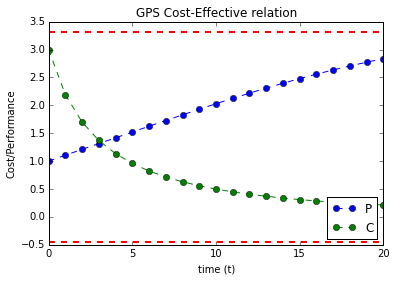

In [94]:
# Plot the ode results
plt.plot(t, Nt, '--o')
plt.xlabel('time (t)')
plt.ylabel('Cost/Performance')
plt.legend(['P', 'C'], loc='lower right')
plt.title('GPS Cost-Effective relation')

plt.axhline(y=plotequils[0], linewidth=2, color='red', ls='--')
plt.axhline(y=plotequils[1], linewidth=2, color='red', ls='--')

Efectivamente se ve una disminución fuerte en el costo mientras que el desempeño aumenta con una asíntota superior, lo cual corresponde con la realidad.

**Bibliography**


- [1] Differential equation Dinamical System based assestment model in GNSS interoperabilidad. (2011) Han tao, 

- Como integrar EDO usando sympy http://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.odeint.html

- Precios de algunos GPS
https://inertialsense.com/attending-auvsis-exponential-csv-logger-ustar-grant/

- Resolviendo Lotka Volterra usando Python + R https://climateecology.wordpress.com/tag/sympy/
https://inertialsense.com/download/uins-2-datasheet/?wpdmdl=204

- Ecuaciones diferenciales usando Python http://relopezbriega.github.io/blog/2016/01/10/ecuaciones-diferenciales-con-python/

- http://e-spacio.uned.es/fez/eserv/bibliuned:masterMatavanz-Acano/Documento.pdf 
